In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [6]:
#loading the dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#this is composite transform, i.e., it joins multiple transforms and applies them at once

train_dataset = torchvision.datasets.CIFAR10(root = r"C:\Users\mishr_o9lk6qh\3 month plan\Week3\Learning Pytorch - 60 mins blitz and youtube video\data", train = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = r"C:\Users\mishr_o9lk6qh\3 month plan\Week3\Learning Pytorch - 60 mins blitz and youtube video\data", train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

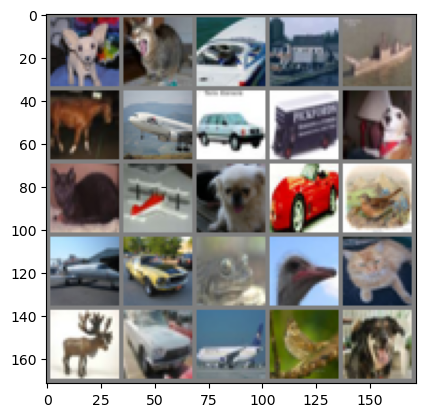

In [9]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
def imshow(imgs):
    imgs = imgs/2 + 0.5
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs,(1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25],nrow=5)
imshow(img_grid)

In [10]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3) #3 ka input, 32 ka output, 3 filters
        self.pool = nn.MaxPool2d(2,2) #4x4 ko 2x2 image banata hai, by picking out the most relevant image segments
        self.conv2 = nn.Conv2d(32,64,3) #pehle ka output iska input
        self.conv3 = nn.Conv2d(64,64,3)
        self.fc1 = nn.Linear(64*4*4,64) #fully connected layer...for classification
        #the dimension 64*4*4 is the number of channels 64 * image size (4*4)
        self.fc2 = nn.Linear(64,10)

    def forward(self,x):
        x = F.relu(self.conv1(x)) # N = 32 (batch size), 30, 30 (image size)
        x = self.pool(x) # 32,15,15
        x = F.relu(self.conv2(x)) #64,13,13
        x = self.pool(x) #64,6,6
        x = F.relu(self.conv3(x)) #64,4,4
        x = torch.flatten(x,1) #1024
        x = F.relu(self.fc1(x)) #64
        x = self.fc2(x) #10
        return x

In [11]:
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
#training model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss/n_total_steps:.3f}')

print('Finished Training')

[1] loss: 1.498
[2] loss: 1.121
[3] loss: 0.955
[4] loss: 0.847
[5] loss: 0.770
[6] loss: 0.716
[7] loss: 0.669
[8] loss: 0.625
[9] loss: 0.590
[10] loss: 0.556
Finished Training


In [13]:
#same model
path = './cnn_CIFAR10.pth'
torch.save(model.state_dict(), path)

In [14]:
#loading model
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(path))
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images,labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _,predicted = torch.max(outputs,1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100 * n_correct/n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100 * n_correct2/n_samples
    print(f'Accuracy of the model: {acc} %')
    

Accuracy of the model: 72.97 %
Accuracy of the model: 72.97 %
